In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

historical_currency_exchange = pd.read_parquet("/content/drive/MyDrive/ai/historical_currency_exchange.parquet")
transaction_fraud_exchange = pd.read_parquet("/content/drive/MyDrive/ai/transaction_fraud_data.parquet")

In [3]:
historical_currency_exchange.head()

,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1
3,2024-10-03,1.456279,5.442044,1.351451,0.906018,0.754584,146.916773,19.457701,1670.097873,95.655442,1.294391,1
4,2024-10-04,1.460930,5.477788,1.355260,0.906452,0.761891,146.592323,19.363467,1649.763738,94.755337,1.296800,1


In [4]:
transaction_fraud_exchange.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True


# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Настройка pandas для лучшего отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Библиотеки импортированы успешно")


✅ Библиотеки импортированы успешно


In [4]:
try:
    # Загрузка основного датасета транзакций
    df_transactions = pd.read_parquet('/content/drive/MyDrive/ai/transaction_fraud_data.parquet')
    print(f"✅ Датасет транзакций загружен: {df_transactions.shape}")

    # Загрузка данных обменных курсов
    df_exchange = pd.read_parquet('/content/drive/MyDrive/ai/historical_currency_exchange.parquet')
    print(f"✅ Данные обменных курсов загружены: {df_exchange.shape}")

except FileNotFoundError as e:
    print(f"❌ Ошибка загрузки файлов: {e}")
    print("Убедитесь, что файлы находятся в рабочей директории")

✅ Датасет транзакций загружен: (7483766, 23)
✅ Данные обменных курсов загружены: (31, 12)


In [5]:
print("=== СТРУКТУРА ДАТАСЕТА ТРАНЗАКЦИЙ ===")
print(f"Форма: {df_transactions.shape}")
print(f"\nТипы данных:")
print(df_transactions.dtypes)

=== СТРУКТУРА ДАТАСЕТА ТРАНЗАКЦИЙ ===
Форма: (7483766, 23)

Типы данных:
transaction_id                     object
customer_id                        object
card_number                         int64
timestamp                  datetime64[us]
vendor_category                    object
vendor_type                        object
vendor                             object
amount                            float64
currency                           object
country                            object
city                               object
city_size                          object
card_type                          object
is_card_present                      bool
device                             object
channel                            object
device_fingerprint                 object
ip_address                         object
is_outside_home_country              bool
is_high_risk_vendor                  bool
is_weekend                           bool
last_hour_activity                 object
is_

In [6]:
print(f"\n=== СТРУКТУРА ДАТАСЕТА ОБМЕННЫХ КУРСОВ ===")
print(f"Форма: {df_exchange.shape}")
print(f"\nТипы данных:")
print(df_exchange.dtypes)


=== СТРУКТУРА ДАТАСЕТА ОБМЕННЫХ КУРСОВ ===
Форма: (31, 12)

Типы данных:
date     object
AUD     float64
BRL     float64
CAD     float64
EUR     float64
GBP     float64
JPY     float64
MXN     float64
NGN     float64
RUB     float64
SGD     float64
USD       int64
dtype: object


In [7]:
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_exchange['date'] = pd.to_datetime(df_exchange['date'])

print("✅ Временные поля преобразованы в datetime")

✅ Временные поля преобразованы в datetime


In [8]:
# Добавим полезные временные признаки
df_transactions['date'] = df_transactions['timestamp'].dt.date
df_transactions['hour'] = df_transactions['timestamp'].dt.hour
df_transactions['day_of_week'] = df_transactions['timestamp'].dt.dayofweek
df_transactions['day_name'] = df_transactions['timestamp'].dt.day_name()

print("✅ Дополнительные временные признаки созданы")

✅ Дополнительные временные признаки созданы


In [9]:
# Распаковка вложенной структуры last_hour_activity
print("Распаковка поля last_hour_activity...")

# Извлечение компонентов из вложенной структуры
df_transactions['lha_num_transactions'] = df_transactions['last_hour_activity'].apply(lambda x: x['num_transactions'] if x else None)
df_transactions['lha_total_amount'] = df_transactions['last_hour_activity'].apply(lambda x: x['total_amount'] if x else None)
df_transactions['lha_unique_merchants'] = df_transactions['last_hour_activity'].apply(lambda x: x['unique_merchants'] if x else None)
df_transactions['lha_unique_countries'] = df_transactions['last_hour_activity'].apply(lambda x: x['unique_countries'] if x else None)
df_transactions['lha_max_single_amount'] = df_transactions['last_hour_activity'].apply(lambda x: x['max_single_amount'] if x else None)

print("✅ Поле last_hour_activity распаковано")

Распаковка поля last_hour_activity...
✅ Поле last_hour_activity распаковано


In [10]:
print("=== АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===")
missing_data = df_transactions.isnull().sum()
missing_percent = 100 * missing_data / len(df_transactions)
missing_table = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
}).sort_values('Процент пропусков', ascending=False)

print(missing_table[missing_table['Количество пропусков'] > 0])

=== АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===
Empty DataFrame
Columns: [Количество пропусков, Процент пропусков]
Index: []


In [11]:
print("=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ ===")

categorical_cols = ['vendor_category', 'currency', 'country', 'city_size',
                   'card_type', 'device', 'channel']

for col in categorical_cols[:3]:  # Показываем первые 3 для экономии места
    print(f"\n{col.upper()}:")
    print(df_transactions[col].value_counts().head(10))

=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ ===

VENDOR_CATEGORY:
vendor_category
Healthcare       936770
Restaurant       936178
Entertainment    936173
Retail           935883
Travel           935790
Gas              935401
Grocery          934029
Education        933542
Name: count, dtype: int64

CURRENCY:
currency
EUR    1065751
NGN     849840
BRL     804800
RUB     793730
MXN     785704
SGD     588668
GBP     538493
CAD     532632
JPY     527393
USD     500060
Name: count, dtype: int64

COUNTRY:
country
Nigeria      849840
Brazil       804800
Russia       793730
Mexico       785704
Singapore    588668
France       541287
UK           538493
Canada       532632
Japan        527393
Germany      524464
Name: count, dtype: int64


=== АНАЛИЗ МОШЕННИЧЕСКИХ ТРАНЗАКЦИЙ ===
Распределение мошеннических транзакций:
Легитимные: 5,989,047 (80.03%)
Мошеннические: 1,494,719 (19.97%)


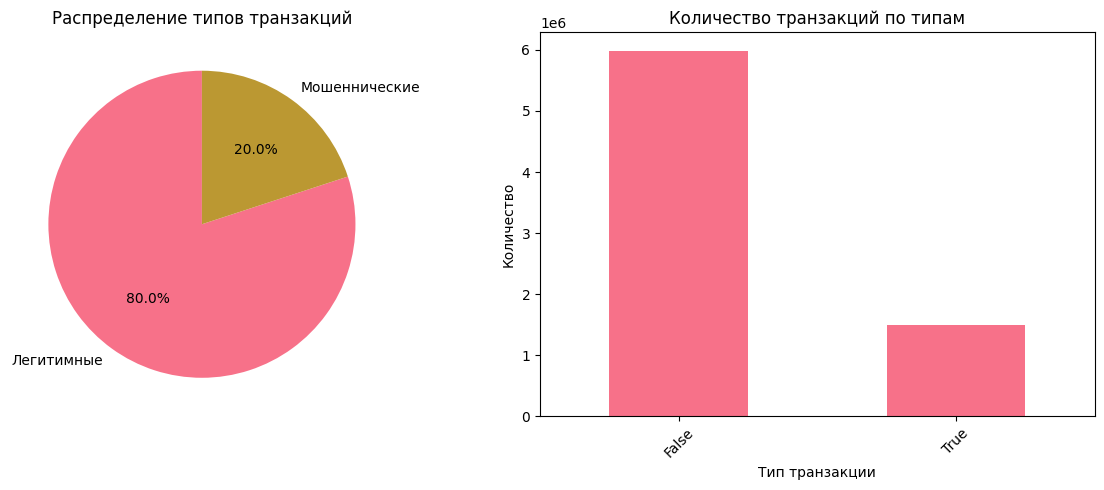

In [12]:
# Анализ дисбаланса классов
print("=== АНАЛИЗ МОШЕННИЧЕСКИХ ТРАНЗАКЦИЙ ===")
fraud_distribution = df_transactions['is_fraud'].value_counts()
fraud_percentage = df_transactions['is_fraud'].value_counts(normalize=True) * 100

print("Распределение мошеннических транзакций:")
print(f"Легитимные: {fraud_distribution[False]:,} ({fraud_percentage[False]:.2f}%)")
print(f"Мошеннические: {fraud_distribution[True]:,} ({fraud_percentage[True]:.2f}%)")

# Визуализация дисбаланса классов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
ax1.pie(fraud_distribution.values, labels=['Легитимные', 'Мошеннические'],
        autopct='%1.1f%%', startangle=90)
ax1.set_title('Распределение типов транзакций')

# Bar chart
fraud_distribution.plot(kind='bar', ax=ax2)
ax2.set_title('Количество транзакций по типам')
ax2.set_xlabel('Тип транзакции')
ax2.set_ylabel('Количество')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


=== АНАЛИЗ ПО КАТЕГОРИЯМ ПРОДАВЦОВ ===
Fraud rate по категориям продавцов:
                 total_transactions  fraud_count  fraud_rate
vendor_category                                             
Travel                       935790       187477      0.2003
Grocery                      934029       186987      0.2002
Restaurant                   936178       186951      0.1997
Gas                          935401       186829      0.1997
Entertainment                936173       186890      0.1996
Education                    933542       186203      0.1995
Healthcare                   936770       186769      0.1994
Retail                       935883       186613      0.1994


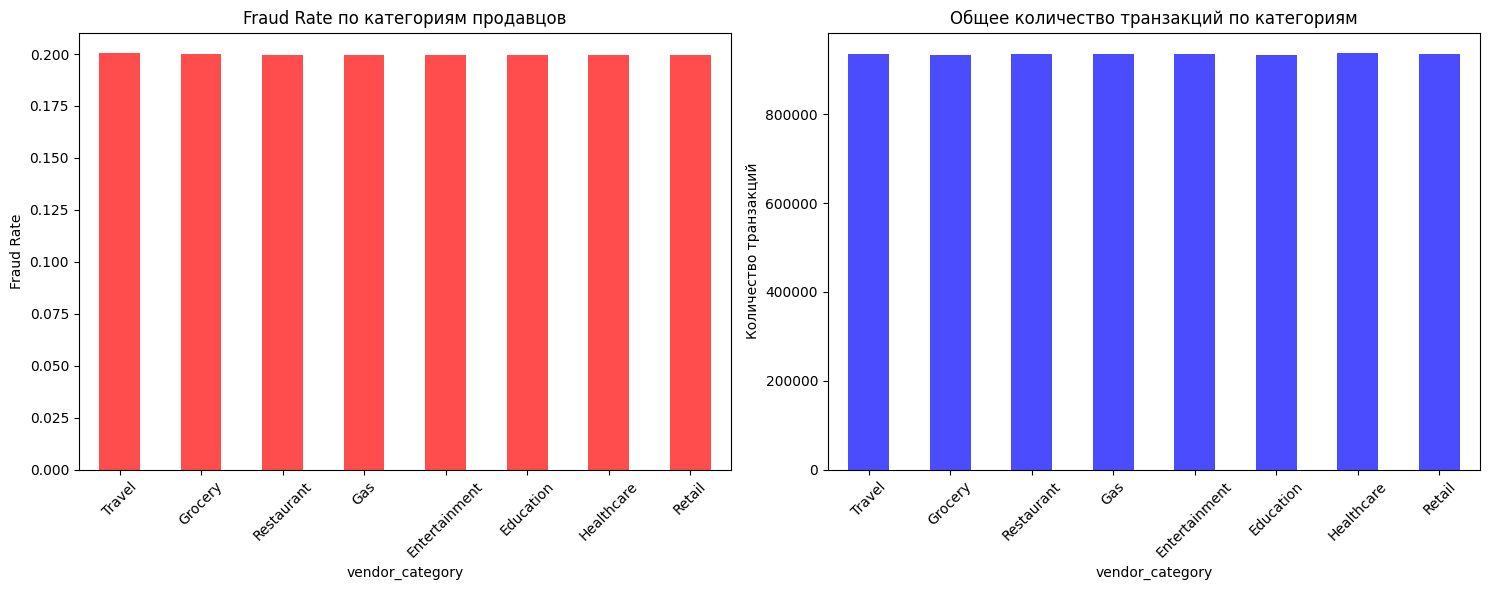

In [13]:
# Анализ по категориям продавцов
print("=== АНАЛИЗ ПО КАТЕГОРИЯМ ПРОДАВЦОВ ===")

# Расчет fraud rate по категориям
fraud_by_category = df_transactions.groupby('vendor_category').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_category.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
fraud_by_category = fraud_by_category.sort_values('fraud_rate', ascending=False)

print("Fraud rate по категориям продавцов:")
print(fraud_by_category)

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Fraud rate
fraud_by_category['fraud_rate'].plot(kind='bar', ax=ax1, color='red', alpha=0.7)
ax1.set_title('Fraud Rate по категориям продавцов')
ax1.set_ylabel('Fraud Rate')
ax1.tick_params(axis='x', rotation=45)

# Общее количество транзакций
fraud_by_category['total_transactions'].plot(kind='bar', ax=ax2, color='blue', alpha=0.7)
ax2.set_title('Общее количество транзакций по категориям')
ax2.set_ylabel('Количество транзакций')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [14]:

# Анализ по географии
print("=== ГЕОГРАФИЧЕСКИЙ АНАЛИЗ ===")

# Топ стран по fraud rate
fraud_by_country = df_transactions.groupby('country').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_country.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
fraud_by_country = fraud_by_country[fraud_by_country['total_transactions'] >= 100]  # Минимум 100 транзакций
fraud_by_country = fraud_by_country.sort_values('fraud_rate', ascending=False)

print("Топ-10 стран по fraud rate (минимум 100 транзакций):")
print(fraud_by_country.head(10))


=== ГЕОГРАФИЧЕСКИЙ АНАЛИЗ ===
Топ-10 стран по fraud rate (минимум 100 транзакций):
           total_transactions  fraud_count  fraud_rate
country                                               
Mexico                 785704       298841      0.3803
Russia                 793730       299425      0.3772
Brazil                 804800       298629      0.3711
Nigeria                849840       298600      0.3514
Australia              496695        37652      0.0758
USA                    500060        37312      0.0746
Japan                  527393        37592      0.0713
Germany                524464        37205      0.0709
Canada                 532632        37278      0.0700
UK                     538493        37345      0.0694


In [15]:
print("=== ВАЛЮТНЫЙ АНАЛИЗ ===")

# Топ валют по fraud rate
fraud_by_currency = df_transactions.groupby('currency').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_currency.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
fraud_by_currency = fraud_by_currency[fraud_by_currency['total_transactions'] >= 100]  # Минимум 100 транзакций
fraud_by_currency = fraud_by_currency.sort_values('fraud_rate', ascending=False)

print("Топ-10 currency по fraud rate (минимум 100 транзакций):")
print(fraud_by_currency.head(10))

=== ВАЛЮТНЫЙ АНАЛИЗ ===
Топ-10 currency по fraud rate (минимум 100 транзакций):
          total_transactions  fraud_count  fraud_rate
currency                                             
MXN                   785704       298841      0.3803
RUB                   793730       299425      0.3772
BRL                   804800       298629      0.3711
NGN                   849840       298600      0.3514
AUD                   496695        37652      0.0758
USD                   500060        37312      0.0746
JPY                   527393        37592      0.0713
CAD                   532632        37278      0.0700
EUR                  1065751        74631      0.0700
GBP                   538493        37345      0.0694


In [16]:
# Анализ транзакций вне домашней страны
print("\n=== АНАЛИЗ ТРАНЗАКЦИЙ ВНЕ ДОМАШНЕЙ СТРАНЫ ===")
outside_home_analysis = df_transactions.groupby('is_outside_home_country')['is_fraud'].agg(['count', 'sum', 'mean'])
outside_home_analysis.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
print(outside_home_analysis)


=== АНАЛИЗ ТРАНЗАКЦИЙ ВНЕ ДОМАШНЕЙ СТРАНЫ ===
                         total_transactions  fraud_count  fraud_rate
is_outside_home_country                                             
False                               5073605       126343    0.024902
True                                2410161      1368376    0.567753


In [17]:
# Анализ по устройствам и каналам
print("=== АНАЛИЗ ПО УСТРОЙСТВАМ И КАНАЛАМ ===")

# По каналам
fraud_by_channel = df_transactions.groupby('channel').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_channel.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
fraud_by_channel = fraud_by_channel.sort_values('fraud_rate', ascending=False)

print("Fraud rate по каналам:")
print(fraud_by_channel)

=== АНАЛИЗ ПО УСТРОЙСТВАМ И КАНАЛАМ ===
Fraud rate по каналам:
         total_transactions  fraud_count  fraud_rate
channel                                             
pos                  651047       651047      1.0000
mobile              2269578       281150      0.1239
web                 4563141       562522      0.1233


In [18]:
df_transactions[df_transactions['channel'] == 'pos']['is_fraud'].sample(5)
df_transactions[df_transactions['channel'] == 'pos']['device_fingerprint'].nunique()
# какая то ошибка в данных

478640

In [24]:
# Анализ по устройствам и каналам
print("=== АНАЛИЗ ПО УСТРОЙСТВАМ И КАНАЛАМ ===")
df_transactions = df_transactions.query("channel != 'pos'")
# По каналам
fraud_by_channel = df_transactions.groupby('channel').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_channel.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
fraud_by_channel = fraud_by_channel.sort_values('fraud_rate', ascending=False)

print("Fraud rate по каналам:")
print(fraud_by_channel)

=== АНАЛИЗ ПО УСТРОЙСТВАМ И КАНАЛАМ ===
Fraud rate по каналам:
         total_transactions  fraud_count  fraud_rate
channel                                             
mobile              2269578       281150      0.1239
web                 4563141       562522      0.1233



Fraud rate по присутствию карты:
                 total_transactions  fraud_count  fraud_rate
is_card_present                                             
False                       6832719       843672      0.1235


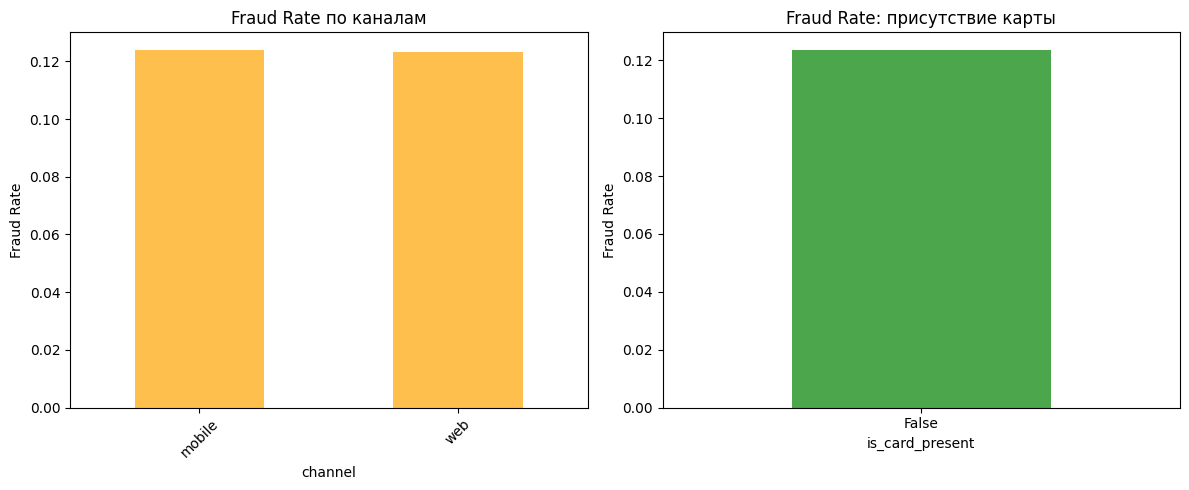

In [25]:
# По присутствию карты
fraud_by_card_present = df_transactions.groupby('is_card_present').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_card_present.columns = ['total_transactions', 'fraud_count', 'fraud_rate']

print("\nFraud rate по присутствию карты:")
print(fraud_by_card_present)

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fraud_by_channel['fraud_rate'].plot(kind='bar', ax=ax1, color='orange', alpha=0.7)
ax1.set_title('Fraud Rate по каналам')
ax1.set_ylabel('Fraud Rate')
ax1.tick_params(axis='x', rotation=45)

fraud_by_card_present['fraud_rate'].plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title('Fraud Rate: присутствие карты')
ax2.set_ylabel('Fraud Rate')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

=== АНАЛИЗ АКТИВНОСТИ ЗА ПОСЛЕДНИЙ ЧАС ===
Статистика активности за последний час:
         lha_num_transactions                                             \
                        count        mean         std  min    25%    50%   
is_fraud                                                                   
False               5989047.0  408.262533  390.672430  0.0  105.0  292.0   
True                 843672.0  412.652732  392.622095  0.0  108.0  296.0   

                        lha_total_amount                              \
            75%     max            count          mean           std   
is_fraud                                                               
False     605.0  3962.0        5989047.0  1.985784e+07  3.560844e+07   
True      611.0  3827.0         843672.0  2.013737e+07  3.591289e+07   

                                                                             \
                min           25%           50%           75%           max   
is_fraud         

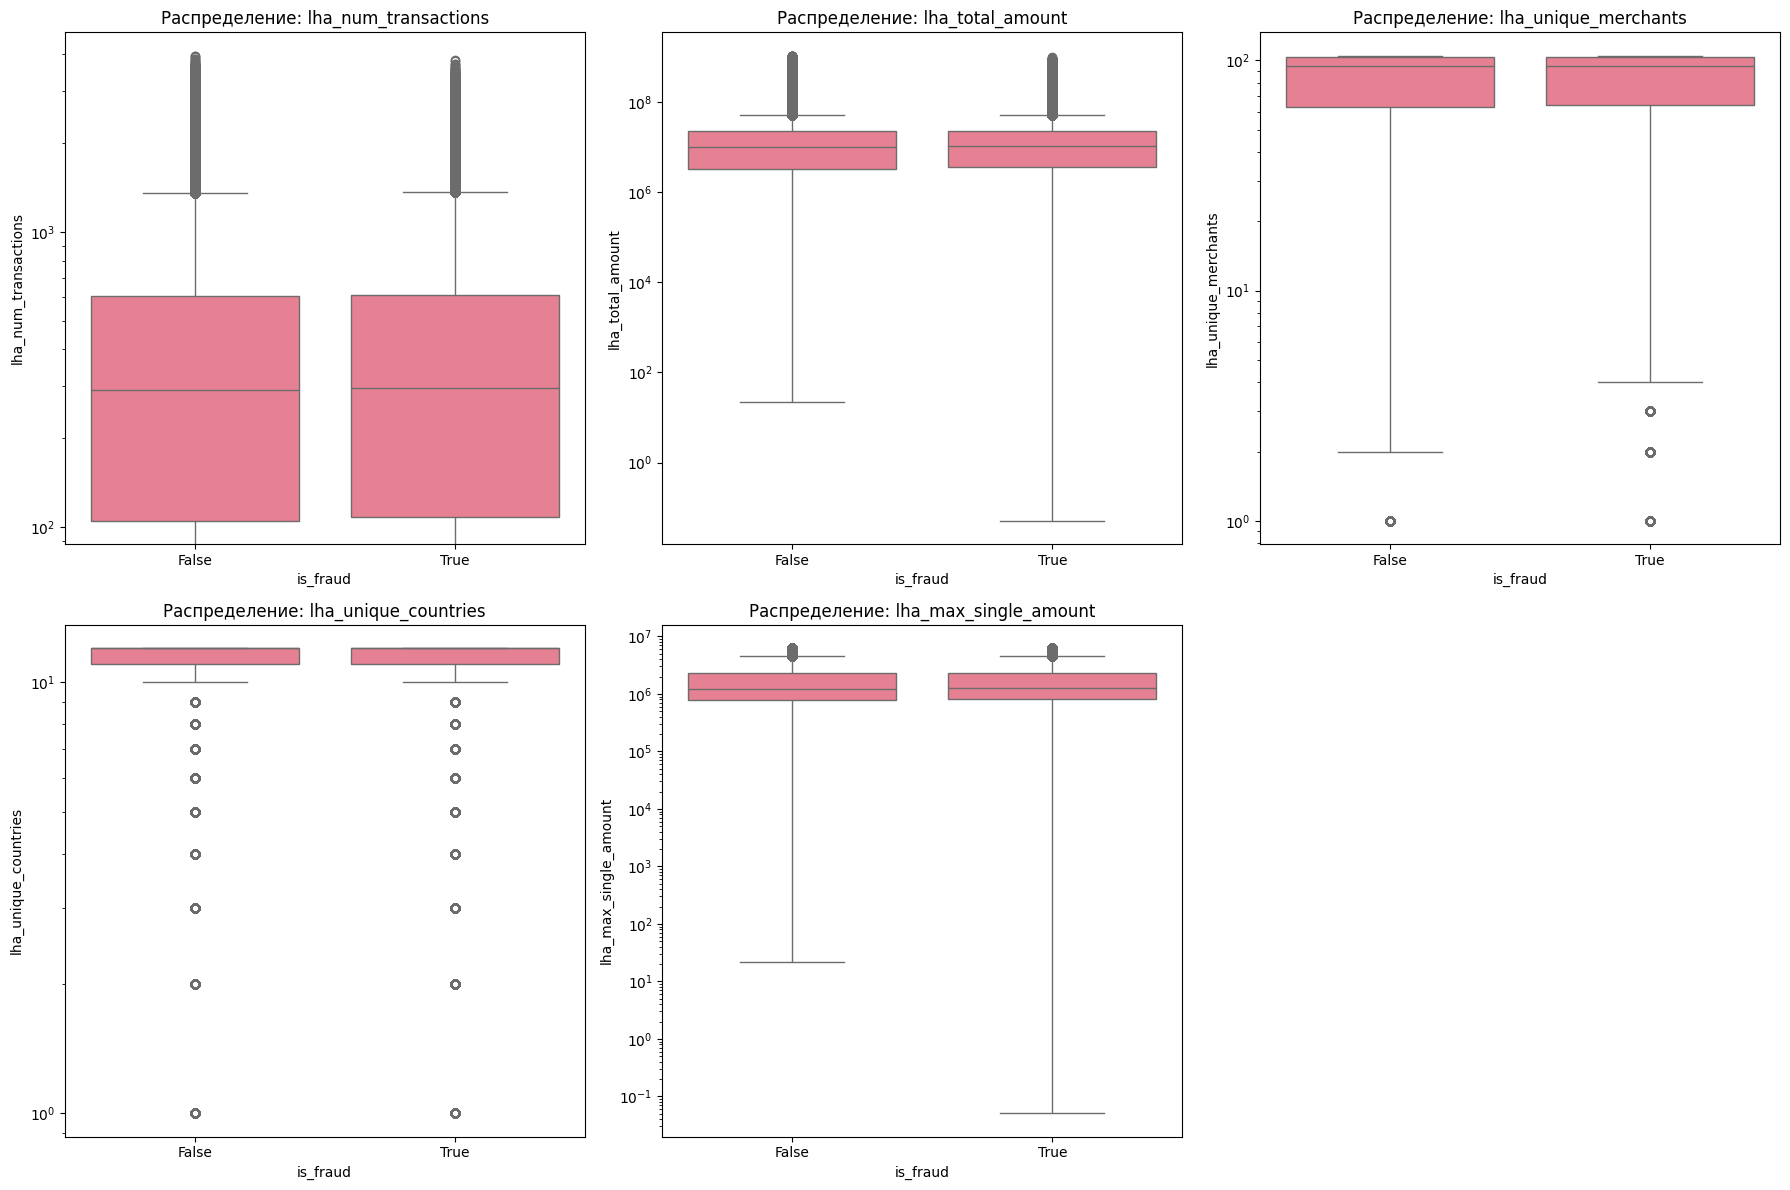

In [26]:
# Анализ активности за последний час
print("=== АНАЛИЗ АКТИВНОСТИ ЗА ПОСЛЕДНИЙ ЧАС ===")

# Статистика по активности за час для мошеннических и легитимных транзакций
lha_columns = ['lha_num_transactions', 'lha_total_amount', 'lha_unique_merchants',
               'lha_unique_countries', 'lha_max_single_amount']

lha_stats = df_transactions.groupby('is_fraud')[lha_columns].describe()
print("Статистика активности за последний час:")
print(lha_stats)

# Визуализация
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(lha_columns):
    if i < 5:  # У нас 5 признаков
        sns.boxplot(data=df_transactions, x='is_fraud', y=col, ax=axes[i])
        axes[i].set_title(f'Распределение: {col}')
        axes[i].set_yscale('log')  # Логарифмическая шкала

# Удаляем лишний subplot
axes[5].remove()

plt.tight_layout()
plt.show()


=== ВРЕМЕННОЙ АНАЛИЗ ===
Fraud rate по часам:
      total_transactions  fraud_count  fraud_rate
hour                                             
0                 137742        23502      0.1706
1                 208014        93877      0.4513
2                 207839        93392      0.4493
3                 207973        93563      0.4499
4                 208819        93771      0.4491
5                 190294        23594      0.1240
6                 178748        23495      0.1314
7                 283314        23456      0.0828
8                 387137        23348      0.0603
9                 334407        23478      0.0702
10                282503        23397      0.0828
11                334372        23730      0.0710
12                386624        23398      0.0605
13                334327        23600      0.0706
14                281936        23449      0.0832
15                282380        23531      0.0833
16                334355        23383      0.0699
17  

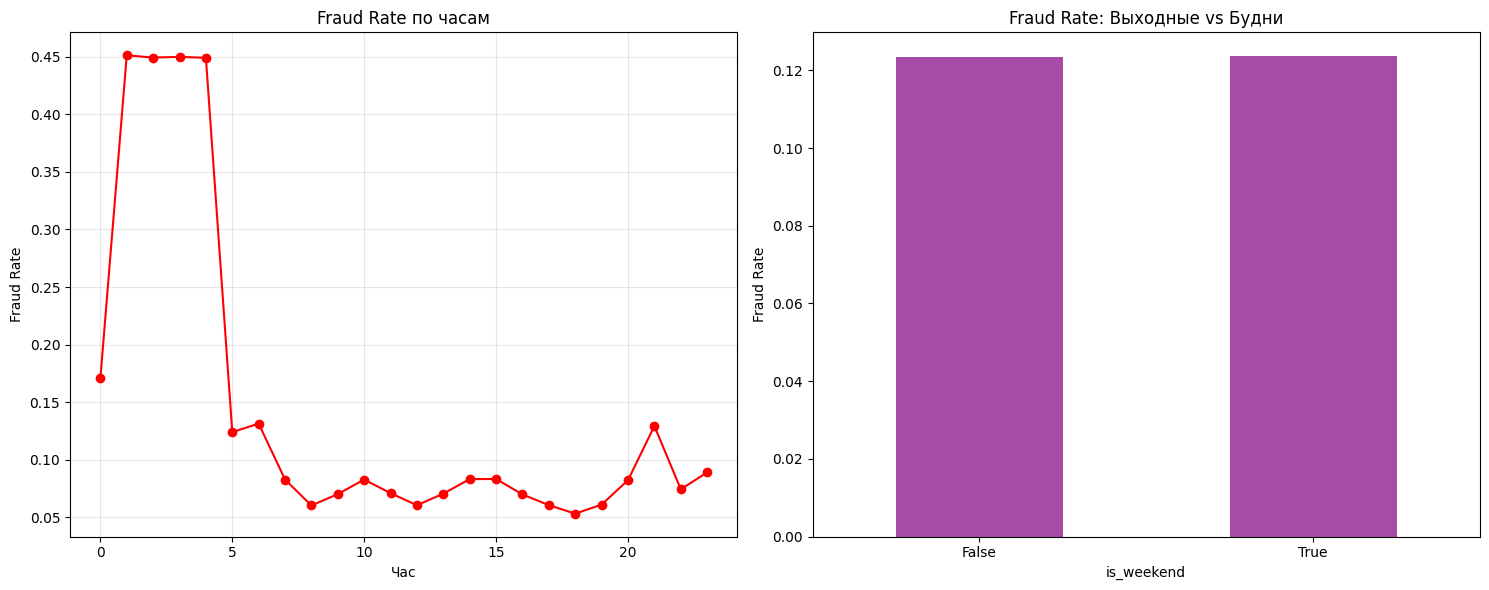

In [27]:
print("=== ВРЕМЕННОЙ АНАЛИЗ ===")

# Fraud rate по часам
fraud_by_hour = df_transactions.groupby('hour').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_hour.columns = ['total_transactions', 'fraud_count', 'fraud_rate']

print("Fraud rate по часам:")
print(fraud_by_hour)

# Fraud rate по дням недели
fraud_by_day = df_transactions.groupby('day_name').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_day.columns = ['total_transactions', 'fraud_count', 'fraud_rate']

print("\nFraud rate по дням недели:")
print(fraud_by_day)

# Анализ выходных
fraud_by_weekend = df_transactions.groupby('is_weekend').agg({
    'is_fraud': ['count', 'sum', 'mean']
}).round(4)
fraud_by_weekend.columns = ['total_transactions', 'fraud_count', 'fraud_rate']

print("\nFraud rate: выходные vs будни:")
print(fraud_by_weekend)

# Визуализация временных паттернов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# По часам
fraud_by_hour['fraud_rate'].plot(kind='line', ax=ax1, marker='o', color='red')
ax1.set_title('Fraud Rate по часам')
ax1.set_xlabel('Час')
ax1.set_ylabel('Fraud Rate')
ax1.grid(True, alpha=0.3)

# По дням недели
fraud_by_weekend['fraud_rate'].plot(kind='bar', ax=ax2, color='purple', alpha=0.7)
ax2.set_title('Fraud Rate: Выходные vs Будни')
ax2.set_ylabel('Fraud Rate')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===
Корреляция признаков с is_fraud:
is_fraud                   1.000000
is_outside_home_country    0.552577
hour                      -0.235898
lha_max_single_amount      0.008061
lha_unique_countries       0.007368
lha_unique_merchants       0.005732
lha_num_transactions       0.003695
lha_total_amount           0.002580
day_of_week                0.000381
is_high_risk_vendor        0.000221
is_weekend                 0.000166
Name: is_fraud, dtype: float64


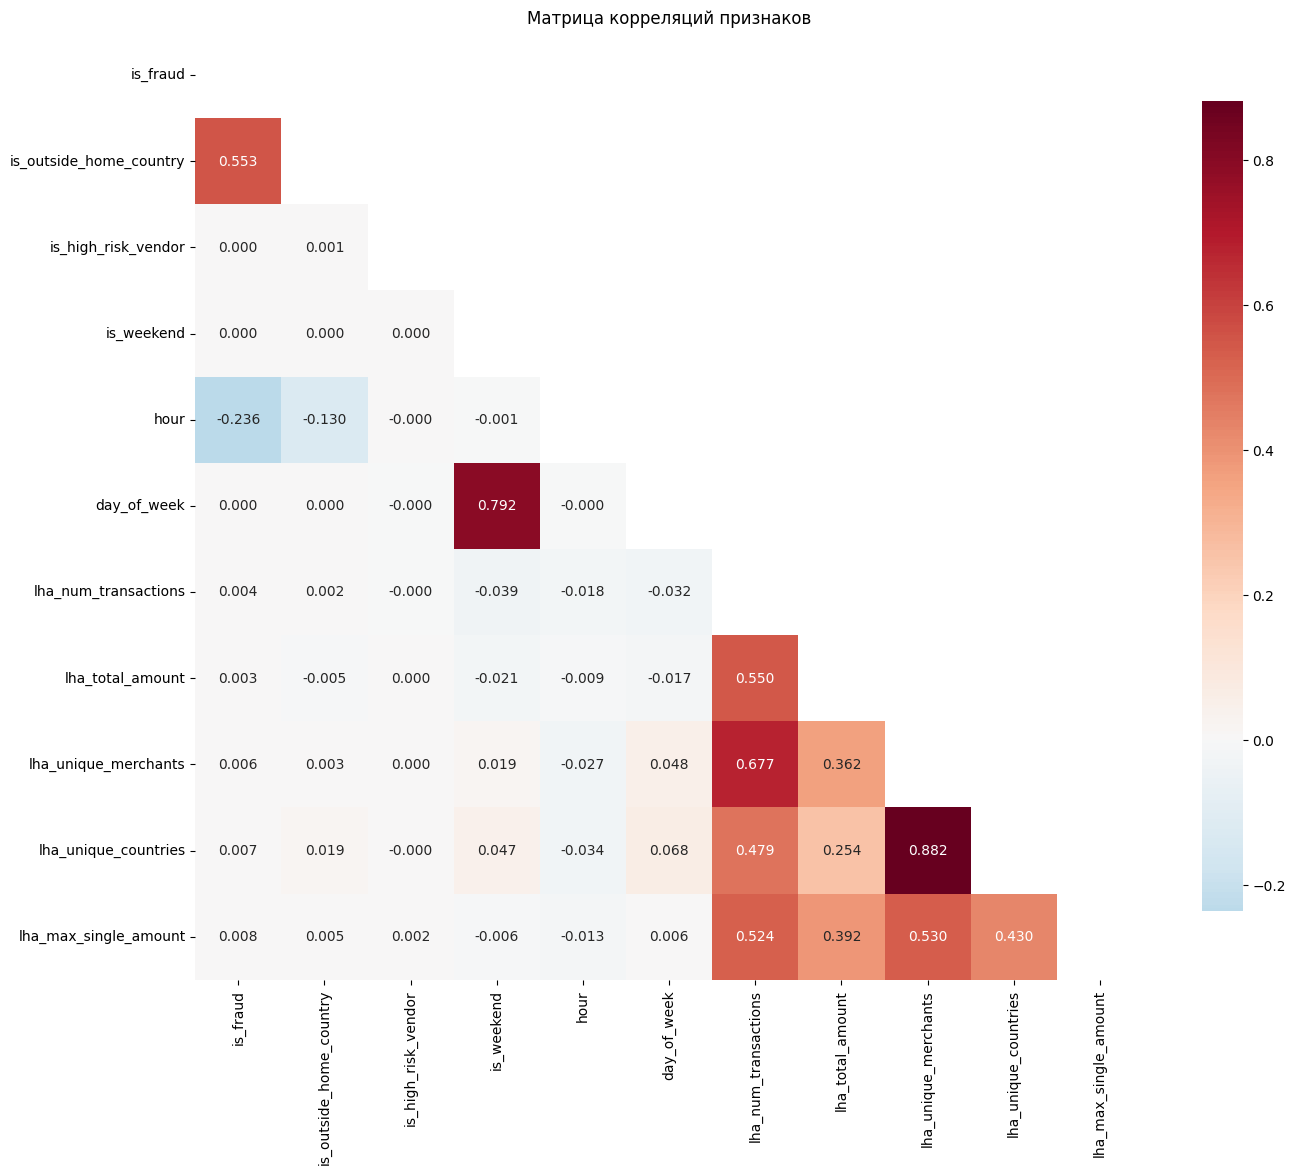

In [29]:
# Подготовка данных для корреляционного анализа
print("=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")

# Создаем датафрейм только с числовыми признаками для корреляции
correlation_features = [
    'is_fraud', 'is_outside_home_country',
    'is_high_risk_vendor', 'is_weekend', 'hour', 'day_of_week',
    'lha_num_transactions', 'lha_total_amount', 'lha_unique_merchants',
    'lha_unique_countries', 'lha_max_single_amount'
]

# Преобразуем булевы признаки в числовые
df_corr = df_transactions[correlation_features].copy()
bool_columns = ['is_fraud', 'is_outside_home_country',
                'is_high_risk_vendor', 'is_weekend']
for col in bool_columns:
    df_corr[col] = df_corr[col].astype(int)

# Вычисляем матрицу корреляций
correlation_matrix = df_corr.corr()

print("Корреляция признаков с is_fraud:")
fraud_correlations = correlation_matrix['is_fraud'].sort_values(key=abs, ascending=False)
print(fraud_correlations)

# Визуализация матрицы корреляций
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, mask=mask, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()


=== ДЕТАЛЬНЫЙ АНАЛИЗ КЛЮЧЕВЫХ ПРИЗНАКОВ ===
Топ признаков по корреляции с мошенничеством:
is_outside_home_country: 0.5526
hour: -0.2359
lha_max_single_amount: 0.0081
lha_unique_countries: 0.0074
lha_unique_merchants: 0.0057
lha_num_transactions: 0.0037
lha_total_amount: 0.0026
day_of_week: 0.0004


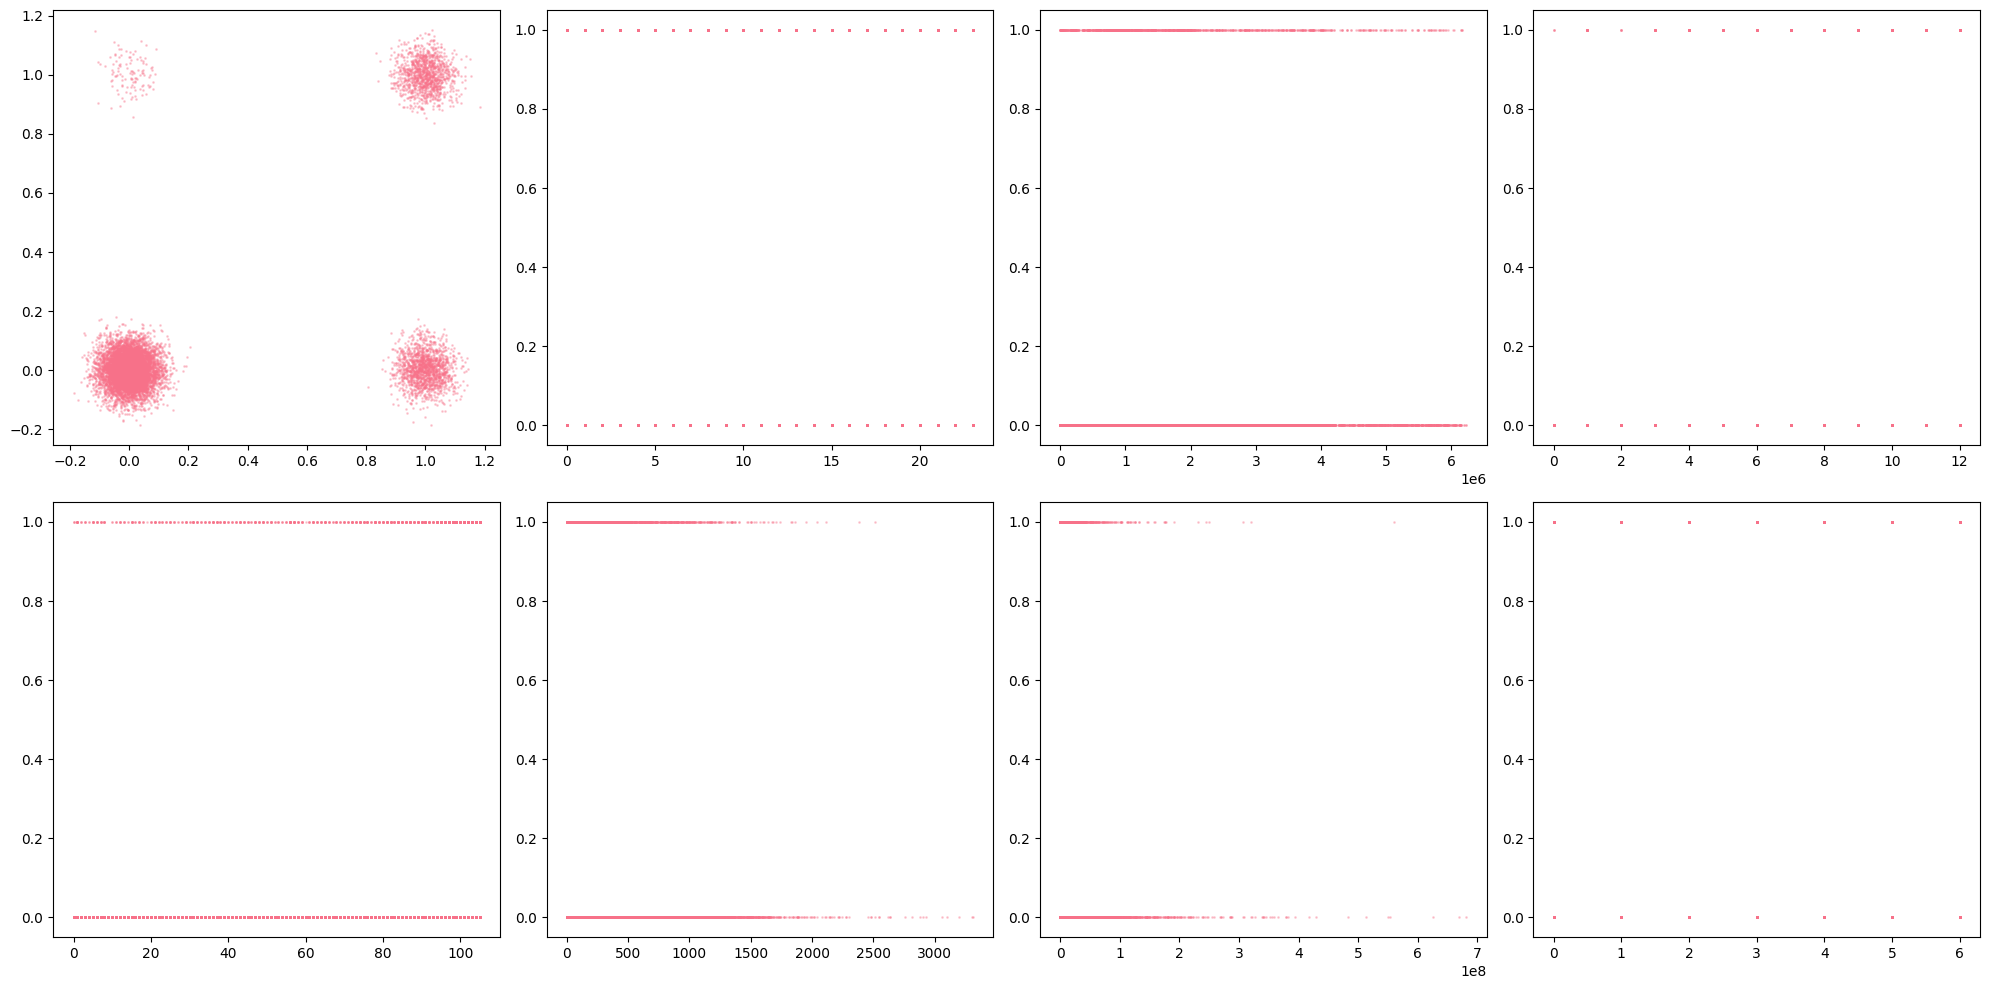

In [33]:
# Более детальный анализ признаков с высокой корреляцией с мошенничеством
print("=== ДЕТАЛЬНЫЙ АНАЛИЗ КЛЮЧЕВЫХ ПРИЗНАКОВ ===")

# Топ признаки по корреляции с мошенничеством (исключая сам is_fraud)
top_features = fraud_correlations.drop('is_fraud').head(8)
print("Топ признаков по корреляции с мошенничеством:")
for feature, corr in top_features.items():
    print(f"{feature}: {corr:.4f}")

# Создаем scatter plots для ключевых признаков
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, (feature, corr) in enumerate(top_features.items()):
    if i < 8:
        # Создаем jittered scatter plot для булевых признаков
        if feature in bool_columns:
            x_vals = df_transactions[feature].astype(int) + np.random.normal(0, 0.05, len(df_transactions))
            y_vals = df_transactions['is_fraud'].astype(int) + np.random.normal(0, 0.05, len(df_transactions))
        else:
            x_vals = df_transactions[feature]
            y_vals = df_transactions['is_fraud'].astype(int)

        # Семплируем данные для лучшей производительности
        sample_df = df_transactions[[feature, 'is_fraud']].dropna().sample(n=min(10000, len(df_transactions)), random_state=42)

        # Jitter если булев
        if feature in bool_columns:
            x_vals = sample_df[feature].astype(int) + np.random.normal(0, 0.05, len(sample_df))
            y_vals = sample_df['is_fraud'].astype(int) + np.random.normal(0, 0.05, len(sample_df))
        else:
            x_vals = sample_df[feature]
            y_vals = sample_df['is_fraud'].astype(int)

        axes[i].scatter(x_vals, y_vals, alpha=0.3, s=1)


plt.tight_layout()
plt.show()


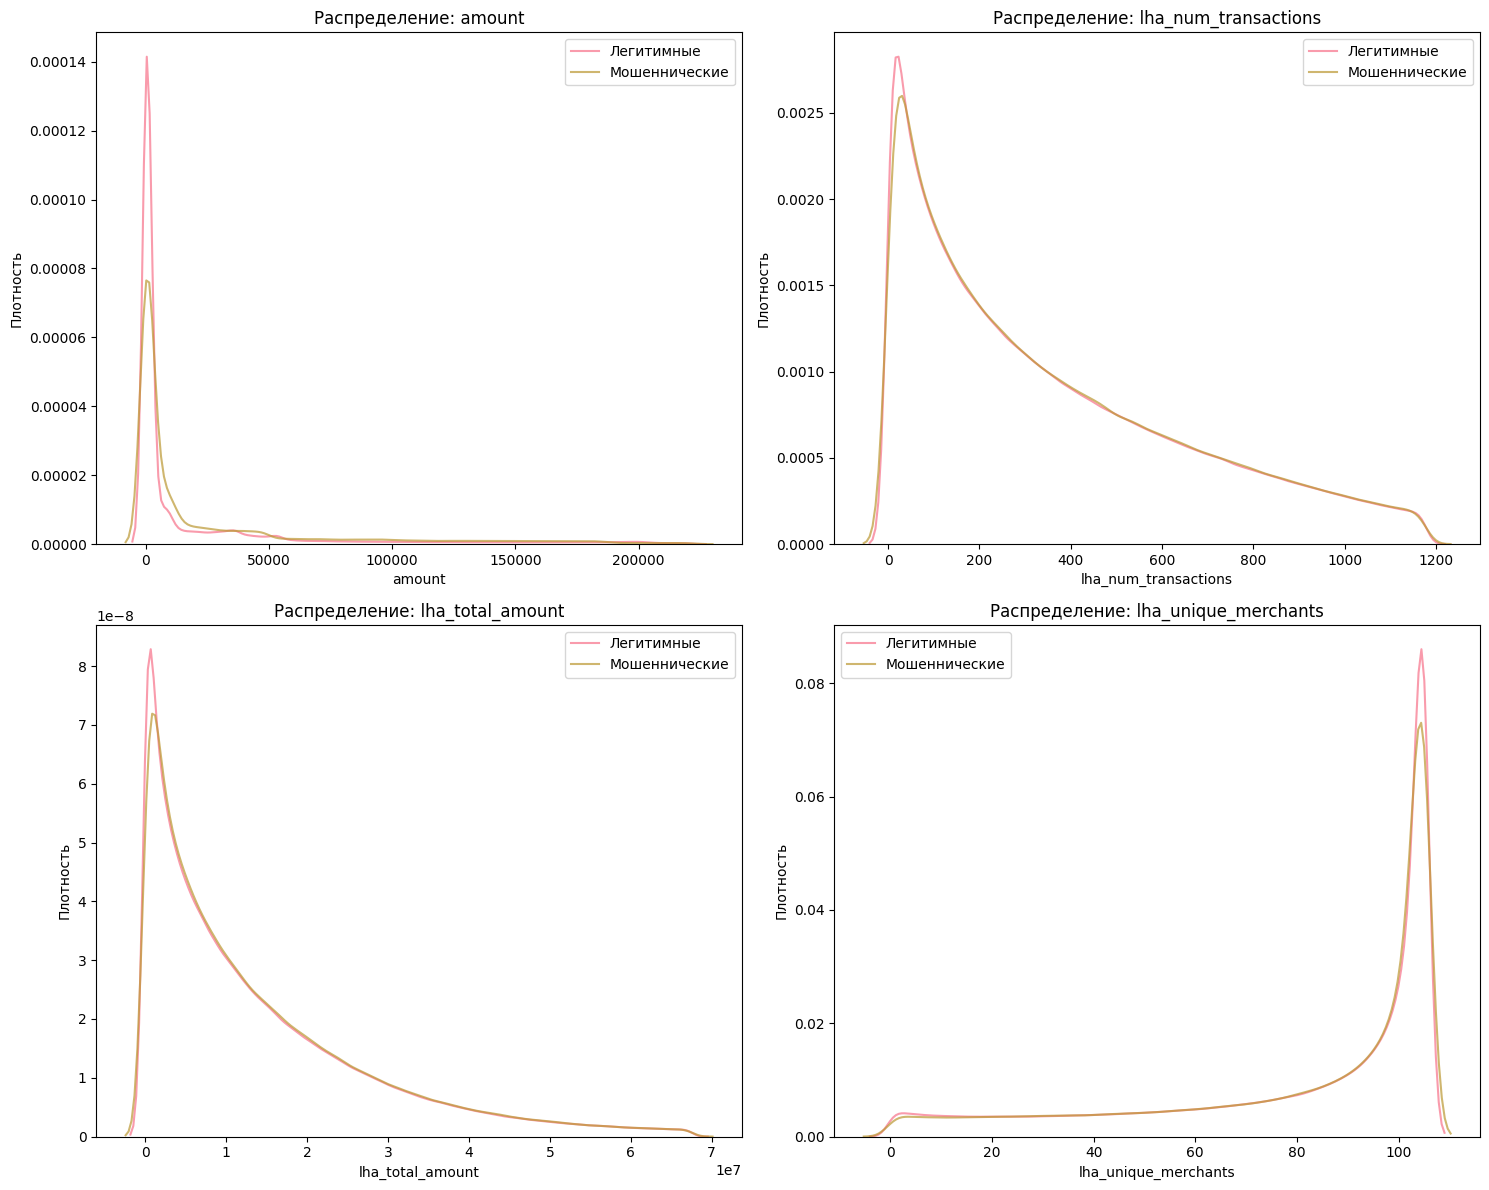

In [23]:
# Анализ распределений для ключевых числовых признаков
numeric_key_features = ['amount', 'lha_num_transactions', 'lha_total_amount', 'lha_unique_merchants']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_key_features):
    # KDE plot для мошеннических и легитимных транзакций
    fraud_data = df_transactions[df_transactions['is_fraud'] == True][feature]
    legit_data = df_transactions[df_transactions['is_fraud'] == False][feature]

    # Обрезаем выбросы для лучшей визуализации
    quantile_95 = df_transactions[feature].quantile(0.95)
    fraud_data_clipped = fraud_data[fraud_data <= quantile_95]
    legit_data_clipped = legit_data[legit_data <= quantile_95]

    sns.kdeplot(data=legit_data_clipped, ax=axes[i], label='Легитимные', alpha=0.7)
    sns.kdeplot(data=fraud_data_clipped, ax=axes[i], label='Мошеннические', alpha=0.7)

    axes[i].set_title(f'Распределение: {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Плотность')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
# ## 5. Выводы и гипотезы
#
# ### Основные находки:
#
# 1. **Дисбаланс классов**: Мошеннические транзакции составляют менее 5% от общего объема
# 2. **Суммы**: Мошеннические транзакции имеют другое распределение сумм по сравнению с легитимными
# 3. **Категории**: Определенные категории продавцов показывают повышенный fraud rate
# 4. **География**: Транзакции вне домашней страны клиента показывают повышенный риск
# 5. **Активность**: Паттерны активности за последний час сильно коррелируют с мошенничеством
# 6. **Каналы**: Различные каналы платежей имеют разный уровень риска
#
# ### Продуктовые гипотезы:
#
# 1. **Динамические лимиты**: Установка лимитов на основе активности за последний час
# 2. **Географические правила**: Дополнительная верификация для транзакций вне домашней страны
# 3. **Категориальные риски**: Повышенный контроль для высокорисковых категорий
# 4. **Канальная сегментация**: Различные правила для разных каналов платежей
#
# ### Технические гипотезы:
#
# 1. **Ensemble модели**: Комбинация rule-based и ML подходов
# 2. **Real-time features**: Использование признаков активности в реальном времени
# 3. **Градиентный бустинг**: XGBoost/LightGBM для работы с дисбалансом классов
# 4. **Feature engineering**: Создание агрегированных признаков по клиентам/картам